# İleri seviye Müşteri Segmentasyonu

Bu projemizde MIT tarafından geliştirilen ileri seviye bir kütüphane kullanılmıştır.
Veriler komplex olduğu için K-Means kullanılamıyor.

In [15]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from kmodes.kprototypes import KPrototypes
from kmodes.kmodes import KModes
from statsmodels.tools import categorical

Her iki sınıf da kümeleme algoritmalarıdır, ancak farklı veri türleri için kullanılırlar:
Her iki sınıf da kümeleme algoritmalarıdır, ancak farklı veri türleri için kullanılırlar:

KModes (Kategorik Veriler için):


Kategorik (nümerik olmayan) verilerin kümelenmesi için kullanılır
Benzeme ölçütü olarak mod (en sık görülen değer) kullanır
Örnek kullanım alanları:

Müşteri segmentasyonu
Kategorik özelliklere sahip pazarlama verilerinin analizi
Metin sınıflandırma
Kategorik özniteliklerle çalışan demografik veri kümelemesi




KPrototypes (Karma Veri Türleri için):


Hem kategorik hem de nümerik verilerin birlikte kümelenmesini sağlar
Kategorik veriler için mod, nümerik veriler için uzaklık hesaplaması yapar
Örnek kullanım alanları:

Karma özellikli müşteri verilerinin analizi
Hem sayısal hem kategorik özelliklere sahip pazar araştırması
Heterojen veri kümelerinin sınıflandırılması
Karma öznitelikli makine öğrenmesi problemleri



Temel fark: KModes sadece kategorik verileri, KPrototypes ise kategorik ve nümerik verilerin bir arada kullanılabildiği karmaşık veri setlerini kümeleyebilir.

In [16]:
df=pd.read_csv("segmentation_data.csv")
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [17]:
df.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [18]:
df_temp=df[["ID","Age","Income"]]

In [19]:
df.drop("ID",axis=1,inplace=True)

In [20]:
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1


In [21]:
scaler = MinMaxScaler()

scaler.fit(df[["Age"]])
df[["Age"]] = scaler.transform(df[["Age"]])

scaler.fit(df[["Income"]])
df[["Income"]] = scaler.transform(df[["Income"]])

In [22]:
mark_array = df._values
# model float kabul ediyor

mark_array[:,2]=mark_array[:,2].astype(float)
mark_array[:,4]=mark_array[:,4].astype(float)

In [23]:
kproto=KPrototypes(n_clusters=10,verbose=2,max_iter=20)
clusters=kproto.fit_predict(mark_array,categorical=[0,1,3,5,6])

print(kproto.cluster_centroids_)
len(kproto.cluster_centroids_)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 793, ncost: 171.50070872855932
Run: 1, iteration: 2/20, moves: 151, ncost: 170.65504666675565
Run: 1, iteration: 3/20, moves: 46, ncost: 168.7015914753236
Run: 1, iteration: 4/20, moves: 17, ncost: 168.616442983765
Run: 1, iteration: 5/20, moves: 6, ncost: 168.6082933381052
Run: 1, iteration: 6/20, moves: 3, ncost: 168.6038447323774
Run: 1, iteration: 7/20, moves: 0, ncost: 168.6038447323774
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 766, ncost: 167.9037871571804
Run: 2, iteration: 2/20, moves: 320, ncost: 163.93538890246828
Run: 2, iteration: 3/20, moves: 64, ncost: 163.59791110744564
Run: 2, iteration: 4/20, moves: 27, ncost: 163.52199071059135
Run: 2, iteration: 5/20, moves: 8, ncost: 163.51787892599128
Run: 2, iteration: 6/20, mo

10

In [24]:
cluster_dict=[]

for c in clusters:
    cluster_dict.append(c)

df["cluster"]=cluster_dict

df[["ID","Age","Income"]]=df_temp

In [25]:
df[df["cluster"]==0].head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster,ID
17,0,0,25,0,157434,1,2,0,100000018
19,0,0,31,0,144657,1,1,0,100000020
31,0,0,27,0,120131,1,1,0,100000032
32,0,0,30,0,162745,1,2,0,100000033
36,0,0,31,0,143385,1,2,0,100000037


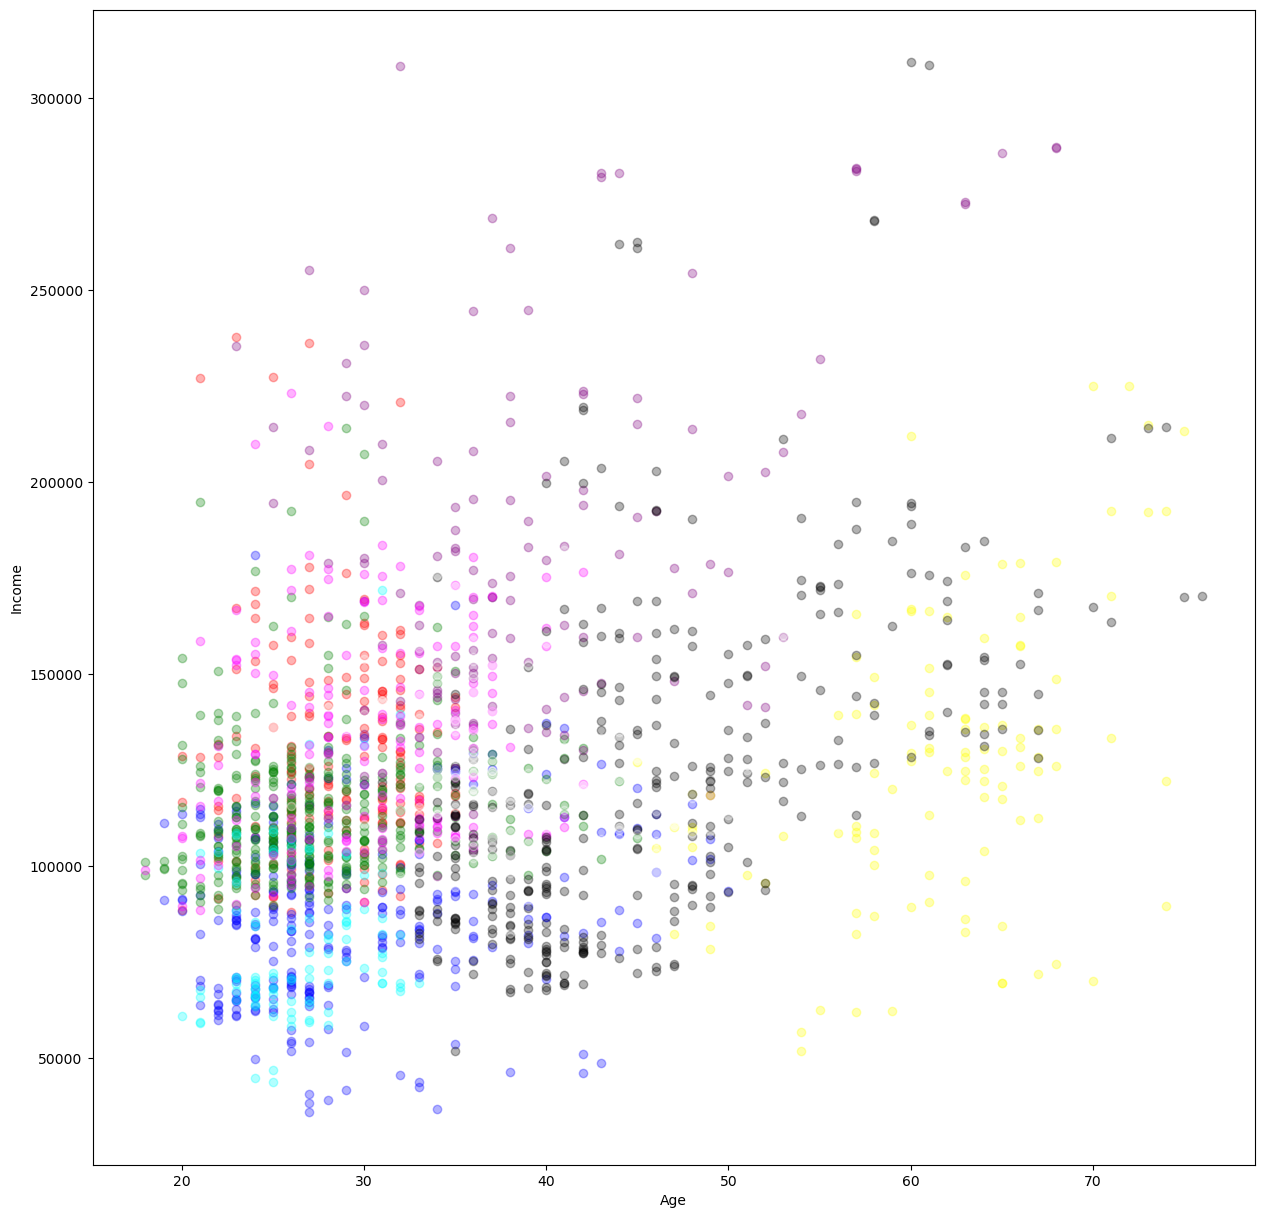

In [34]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
df4=df[df.cluster==3]
df5=df[df.cluster==4]
df6=df[df.cluster==5]
df7=df[df.cluster==6]
df8=df[df.cluster==7]
df9=df[df.cluster==8]
df10=df[df.cluster==9]
df11=df[df.cluster==10]

plt.figure(figsize=(15,15))
plt.xlabel("Age")
plt.ylabel("Income")

plt.scatter(df1.Age,df1["Income"],color="red",alpha=0.3)
plt.scatter(df2.Age,df2["Income"],color="blue",alpha=0.3)
plt.scatter(df3.Age,df3["Income"],color="green",alpha=0.3)
plt.scatter(df4.Age,df4["Income"],color="purple",alpha=0.3)
plt.scatter(df5.Age,df5["Income"],color="yellow",alpha=0.3)
plt.scatter(df6.Age,df6["Income"],color="cyan",alpha=0.3)
plt.scatter(df7.Age,df7["Income"],color="magenta",alpha=0.3)
plt.scatter(df8.Age,df8["Income"],color="black",alpha=0.3)
plt.scatter(df9.Age,df9["Income"],color="white",alpha=0.3)
plt.scatter(df10.Age,df10["Income"],color="black",alpha=0.3)


plt.savefig("AdvancedMusteriSegmentasyonu.png")
plt.show()